In [25]:
import polars as pl
import pandas as pd
import pyarrow
import numpy as np
import matplotlib.pyplot as mp

In [26]:
deliveries=pl.read_csv("https://raw.githubusercontent.com/Ravikumarchavva/Ravikumar/main/csv_files/IPL_Ball_by_Ball_2008_2022.csv")
deliveries

ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
i64,i64,i64,i64,str,str,str,str,i64,i64,i64,i64,i64,str,str,str,str
1312200,1,0,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""NA""",0,0,0,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…"
1312200,1,0,2,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""legbyes""",0,1,1,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…"
1312200,1,0,3,"""JC Buttler""","""Mohammed Shami…","""YBK Jaiswal""","""NA""",1,0,1,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…"
1312200,1,0,4,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""NA""",0,0,0,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…"
1312200,1,0,5,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""NA""",0,0,0,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…"
1312200,1,0,6,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""NA""",0,0,0,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…"
1312200,1,1,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""","""NA""",0,0,0,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…"
1312200,1,1,2,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""","""NA""",0,0,0,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…"
1312200,1,1,3,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""","""NA""",4,0,4,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…"


In [27]:
matches=pl.read_csv("https://raw.githubusercontent.com/Ravikumarchavva/Ravikumar/main/csv_files/IPL_Matches_Result_2008_2022.csv",ignore_errors=True)
matches

ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
i64,str,str,i64,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,str,str
1312200,"""Ahmedabad""","""2022-05-29""",2022,"""Final""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""N""","""Gujarat Titans…","""Wickets""",7,"""NA""","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…","""CB Gaffaney""","""Nitin Menon"""
1312199,"""Ahmedabad""","""2022-05-27""",2022,"""Qualifier 2""","""Royal Challeng…","""Rajasthan Roya…","""Narendra Modi …","""Rajasthan Roya…","""field""","""N""","""Rajasthan Roya…","""Wickets""",7,"""NA""","""JC Buttler""","""['V Kohli', 'F…","""['YBK Jaiswal'…","""CB Gaffaney""","""Nitin Menon"""
1312198,"""Kolkata""","""2022-05-25""",2022,"""Eliminator""","""Royal Challeng…","""Lucknow Super …","""Eden Gardens, …","""Lucknow Super …","""field""","""N""","""Royal Challeng…","""Runs""",14,"""NA""","""RM Patidar""","""['V Kohli', 'F…","""['Q de Kock', …","""J Madanagopal""","""MA Gough"""
1312197,"""Kolkata""","""2022-05-24""",2022,"""Qualifier 1""","""Rajasthan Roya…","""Gujarat Titans…","""Eden Gardens, …","""Gujarat Titans…","""field""","""N""","""Gujarat Titans…","""Wickets""",7,"""NA""","""DA Miller""","""['YBK Jaiswal'…","""['WP Saha', 'S…","""BNJ Oxenford""","""VK Sharma"""
1304116,"""Mumbai""","""2022-05-22""",2022,"""70""","""Sunrisers Hyde…","""Punjab Kings""","""Wankhede Stadi…","""Sunrisers Hyde…","""bat""","""N""","""Punjab Kings""","""Wickets""",5,"""NA""","""Harpreet Brar""","""['PK Garg', 'A…","""['JM Bairstow'…","""AK Chaudhary""","""NA Patwardhan"""
1304115,"""Mumbai""","""2022-05-21""",2022,"""69""","""Delhi Capitals…","""Mumbai Indians…","""Wankhede Stadi…","""Mumbai Indians…","""field""","""N""","""Mumbai Indians…","""Wickets""",5,"""NA""","""JJ Bumrah""","""['PP Shaw', 'D…","""['Ishan Kishan…","""Nitin Menon""","""Tapan Sharma"""
1304114,"""Mumbai""","""2022-05-20""",2022,"""68""","""Chennai Super …","""Rajasthan Roya…","""Brabourne Stad…","""Chennai Super …","""bat""","""N""","""Rajasthan Roya…","""Wickets""",5,"""NA""","""R Ashwin""","""['RD Gaikwad',…","""['YBK Jaiswal'…","""CB Gaffaney""","""NA Patwardhan"""
1304113,"""Mumbai""","""2022-05-19""",2022,"""67""","""Gujarat Titans…","""Royal Challeng…","""Wankhede Stadi…","""Gujarat Titans…","""bat""","""N""","""Royal Challeng…","""Wickets""",8,"""NA""","""V Kohli""","""['WP Saha', 'S…","""['V Kohli', 'F…","""KN Ananthapadm…","""GR Sadashiv Iy…"
1304112,"""Navi Mumbai""","""2022-05-18""",2022,"""66""","""Lucknow Super …","""Kolkata Knight…","""Dr DY Patil Sp…","""Lucknow Super …","""bat""","""N""","""Lucknow Super …","""Runs""",2,"""NA""","""Q de Kock""","""['Q de Kock', …","""['VR Iyer', 'A…","""R Pandit""","""YC Barde"""


In [28]:
matches=matches.filter((pl.col("SuperOver")=="N") & (pl.col("method")=="NA")).drop("Date","Season","MatchNumber","SuperOver","method","WonBy","Margin","Umpire1","Umpire2")
matches

ID,City,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Player_of_Match,Team1Players,Team2Players
i64,str,str,str,str,str,str,str,str,str,str
1312200,"""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312199,"""Ahmedabad""","""Royal Challeng…","""Rajasthan Roya…","""Narendra Modi …","""Rajasthan Roya…","""field""","""Rajasthan Roya…","""JC Buttler""","""['V Kohli', 'F…","""['YBK Jaiswal'…"
1312198,"""Kolkata""","""Royal Challeng…","""Lucknow Super …","""Eden Gardens, …","""Lucknow Super …","""field""","""Royal Challeng…","""RM Patidar""","""['V Kohli', 'F…","""['Q de Kock', …"
1312197,"""Kolkata""","""Rajasthan Roya…","""Gujarat Titans…","""Eden Gardens, …","""Gujarat Titans…","""field""","""Gujarat Titans…","""DA Miller""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1304116,"""Mumbai""","""Sunrisers Hyde…","""Punjab Kings""","""Wankhede Stadi…","""Sunrisers Hyde…","""bat""","""Punjab Kings""","""Harpreet Brar""","""['PK Garg', 'A…","""['JM Bairstow'…"
1304115,"""Mumbai""","""Delhi Capitals…","""Mumbai Indians…","""Wankhede Stadi…","""Mumbai Indians…","""field""","""Mumbai Indians…","""JJ Bumrah""","""['PP Shaw', 'D…","""['Ishan Kishan…"
1304114,"""Mumbai""","""Chennai Super …","""Rajasthan Roya…","""Brabourne Stad…","""Chennai Super …","""bat""","""Rajasthan Roya…","""R Ashwin""","""['RD Gaikwad',…","""['YBK Jaiswal'…"
1304113,"""Mumbai""","""Gujarat Titans…","""Royal Challeng…","""Wankhede Stadi…","""Gujarat Titans…","""bat""","""Royal Challeng…","""V Kohli""","""['WP Saha', 'S…","""['V Kohli', 'F…"
1304112,"""Navi Mumbai""","""Lucknow Super …","""Kolkata Knight…","""Dr DY Patil Sp…","""Lucknow Super …","""bat""","""Lucknow Super …","""Q de Kock""","""['Q de Kock', …","""['VR Iyer', 'A…"


In [29]:
deliveries=deliveries.filter(pl.col("ID").is_in(matches["ID"])).join(matches,on="ID")
deliveries

ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,City,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Player_of_Match,Team1Players,Team2Players
i64,i64,i64,i64,str,str,str,str,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,str,str
1312200,1,0,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""NA""",0,0,0,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,0,2,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""legbyes""",0,1,1,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,0,3,"""JC Buttler""","""Mohammed Shami…","""YBK Jaiswal""","""NA""",1,0,1,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,0,4,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""NA""",0,0,0,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,0,5,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""NA""",0,0,0,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,0,6,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""NA""",0,0,0,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,1,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""","""NA""",0,0,0,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,1,2,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""","""NA""",0,0,0,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,1,3,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""","""NA""",4,0,4,0,0,"""NA""","""NA""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"


In [30]:
deliveries=deliveries.drop("extra_type","batsman_run","extras_run","non_boundary","kind","fielders_involved")
deliveries

ID,innings,overs,ballnumber,batter,bowler,non-striker,total_run,isWicketDelivery,player_out,BattingTeam,City,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Player_of_Match,Team1Players,Team2Players
i64,i64,i64,i64,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str
1312200,1,0,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,0,2,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",1,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,0,3,"""JC Buttler""","""Mohammed Shami…","""YBK Jaiswal""",1,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,0,4,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,0,5,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,0,6,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,1,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,1,2,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"
1312200,1,1,3,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",4,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…"


In [31]:
group_data=deliveries.groupby(pl.col("ID"),pl.col("innings"),pl.col("overs")).agg((pl.col("total_run").sum()),(pl.col("isWicketDelivery").sum())).fill_null(0)
group_data

ID,innings,overs,total_run,isWicketDelivery
i64,i64,i64,i64,i64
1312199,1,15,9,1
1312197,2,19,18,0
1304114,2,15,4,0
1304110,1,3,10,0
1304110,2,12,2,1
1304109,2,8,11,0
1304104,2,14,9,0
1304103,1,10,10,0
1304101,1,12,9,0


In [32]:
final_score_data=group_data.groupby(["ID", "innings"]).agg(pl.col("total_run").sum().alias("final_runs")).sort("ID")
final_score_data

ID,innings,final_runs
i64,i64,i64
335982,1,222
335982,2,82
335983,1,240
335983,2,207
335984,2,132
335984,1,129
335985,1,165
335985,2,166
335986,1,110


In [33]:
deliveries=deliveries.join(final_score_data,on=['ID',"innings"])
deliveries

ID,innings,overs,ballnumber,batter,bowler,non-striker,total_run,isWicketDelivery,player_out,BattingTeam,City,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Player_of_Match,Team1Players,Team2Players,final_runs
i64,i64,i64,i64,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64
1312200,1,0,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130
1312200,1,0,2,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",1,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130
1312200,1,0,3,"""JC Buttler""","""Mohammed Shami…","""YBK Jaiswal""",1,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130
1312200,1,0,4,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130
1312200,1,0,5,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130
1312200,1,0,6,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130
1312200,1,1,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130
1312200,1,1,2,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130
1312200,1,1,3,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",4,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130


In [34]:
deliveries=deliveries.with_columns(((pl.col("overs")+pl.col("ballnumber")/10)).alias("balls")).drop("ballnumber","overs")
deliveries

ID,innings,batter,bowler,non-striker,total_run,isWicketDelivery,player_out,BattingTeam,City,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Player_of_Match,Team1Players,Team2Players,final_runs,balls
i64,i64,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,f64
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.1
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",1,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.2
1312200,1,"""JC Buttler""","""Mohammed Shami…","""YBK Jaiswal""",1,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.3
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.4
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.5
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.6
1312200,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.1
1312200,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.2
1312200,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",4,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.3


In [35]:
deliveries=deliveries.filter(pl.col("Team1")!="Kochi Tuskers Kerala").filter(pl.col("Team1")!="Deccan Chargers").filter(pl.col("Team2")!="Kochi Tuskers Kerala").filter(pl.col("Team2")!="Deccan Chargers")
deliveries

ID,innings,batter,bowler,non-striker,total_run,isWicketDelivery,player_out,BattingTeam,City,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Player_of_Match,Team1Players,Team2Players,final_runs,balls
i64,i64,str,str,str,i64,i64,str,str,str,str,str,str,str,str,str,str,str,str,i64,f64
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.1
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",1,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.2
1312200,1,"""JC Buttler""","""Mohammed Shami…","""YBK Jaiswal""",1,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.3
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.4
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.5
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.6
1312200,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.1
1312200,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.2
1312200,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",4,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…","""bat""","""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.3


In [36]:
deliveries=deliveries.with_columns(pl.col("BattingTeam").str.replace("Rising Pune Supergiant","Pune Warriors"))
deliveries=deliveries.with_columns(pl.col("Team1").str.replace("Rising Pune Supergiant","Pune Warriors"))
deliveries=deliveries.with_columns(pl.col("Team2").str.replace("Rising Pune Supergiant","Pune Warriors"))
deliveries=deliveries.with_columns(pl.col("TossWinner").str.replace("Rising Pune Supergiant","Pune Warriors"))

deliveries=deliveries.with_columns(pl.col("BattingTeam").str.replace("Rising Pune Supergiants","Pune Warriors"))
deliveries=deliveries.with_columns(pl.col("Team1").str.replace("Rising Pune Supergiants","Pune Warriors"))
deliveries=deliveries.with_columns(pl.col("Team2").str.replace("Rising Pune Supergiants","Pune Warriors"))
deliveries=deliveries.with_columns(pl.col("TossWinner").str.replace("Rising Pune Supergiants","Pune Warriors"))

deliveries=deliveries.with_columns(pl.col("BattingTeam").str.replace("Pune Warriorss","Pune Warriors"))
deliveries=deliveries.with_columns(pl.col("Team1").str.replace("Pune Warriorss","Pune Warriors"))
deliveries=deliveries.with_columns(pl.col("Team2").str.replace("Pune Warriorss","Pune Warriors"))
deliveries=deliveries.with_columns(pl.col("TossWinner").str.replace("Pune Warriorss","Pune Warriors"))

deliveries=deliveries.with_columns(pl.col("BattingTeam").str.replace("Delhi Daredevils","Delhi Capitals"))
deliveries=deliveries.with_columns(pl.col("Team1").str.replace("Delhi Daredevils","Delhi Capitals"))
deliveries=deliveries.with_columns(pl.col("Team2").str.replace("Delhi Daredevils","Delhi Capitals"))
deliveries=deliveries.with_columns(pl.col("TossWinner").str.replace("Delhi Daredevils","Delhi Capitals"))


deliveries=deliveries.with_columns(pl.col("TossDecision").str.replace("field",1)).with_columns(pl.col("TossDecision").str.replace("bat",0))

In [37]:
deliveries=deliveries.with_columns(pl.col("TossDecision").cast(pl.Int64()))
deliveries

ID,innings,batter,bowler,non-striker,total_run,isWicketDelivery,player_out,BattingTeam,City,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Player_of_Match,Team1Players,Team2Players,final_runs,balls
i64,i64,str,str,str,i64,i64,str,str,str,str,str,str,str,i64,str,str,str,str,i64,f64
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.1
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",1,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.2
1312200,1,"""JC Buttler""","""Mohammed Shami…","""YBK Jaiswal""",1,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.3
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.4
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.5
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.6
1312200,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.1
1312200,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",0,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.2
1312200,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""",4,0,"""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.3


In [38]:
# window function and cumulative sum
deliveries=deliveries.with_columns(pl.col("total_run").cumsum().over(deliveries["ID"],deliveries["innings"]).alias("current_runs")).drop("total_run").fill_null(0)
deliveries=deliveries.with_columns(pl.col("isWicketDelivery").cumsum().over(deliveries["ID"],deliveries["innings"]).alias("wickets")).drop("isWicketDelivery")
deliveries

ID,innings,batter,bowler,non-striker,player_out,BattingTeam,City,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,Player_of_Match,Team1Players,Team2Players,final_runs,balls,current_runs,wickets
i64,i64,str,str,str,str,str,str,str,str,str,str,i64,str,str,str,str,i64,f64,i64,i64
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.1,0,0
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.2,1,0
1312200,1,"""JC Buttler""","""Mohammed Shami…","""YBK Jaiswal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.3,2,0
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.4,2,0
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.5,2,0
1312200,1,"""YBK Jaiswal""","""Mohammed Shami…","""JC Buttler""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.6,2,0
1312200,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.1,2,0
1312200,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.2,2,0
1312200,1,"""JC Buttler""","""Yash Dayal""","""YBK Jaiswal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Narendra Modi …","""Rajasthan Roya…",0,"""Gujarat Titans…","""HH Pandya""","""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.3,6,0


In [39]:
deliveries=deliveries.drop("ID","Venue","WinningTeam","Player_of_Match","non-striker").fill_null(0)
deliveries

innings,batter,bowler,player_out,BattingTeam,City,Team1,Team2,TossWinner,TossDecision,Team1Players,Team2Players,final_runs,balls,current_runs,wickets
i64,str,str,str,str,str,str,str,str,i64,str,str,i64,f64,i64,i64
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.1,0,0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.2,1,0
1,"""JC Buttler""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.3,2,0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.4,2,0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.5,2,0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.6,2,0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.1,2,0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.2,2,0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.3,6,0


In [40]:
deliveries["City"].unique().to_list()

['Bangalore',
 'Chandigarh',
 'Cape Town',
 'Ahmedabad',
 'Dubai',
 'Kolkata',
 'Ranchi',
 'Jaipur',
 'Durban',
 'Cuttack',
 'Visakhapatnam',
 'Indore',
 'Dharamsala',
 'Delhi',
 'Hyderabad',
 'NA',
 'Johannesburg',
 'East London',
 'Raipur',
 'Navi Mumbai',
 'Rajkot',
 'Kimberley',
 'Mumbai',
 'Centurion',
 'Port Elizabeth',
 'Chennai',
 'Pune',
 'Abu Dhabi',
 'Sharjah',
 'Bloemfontein',
 'Bengaluru',
 'Kanpur']

In [41]:
city_list=['Ahmedabad','Mumbai','Jaipur','Hyderabad','Dharamsala','Bengaluru','Kolkata','Mohali','Delhi','Chennai','Chandigarh','Pune','Bangalore']
deliveries=deliveries.filter((deliveries["City"].is_in(city_list)))
deliveries=deliveries.with_columns(pl.col("City").str.replace('Bengaluru','Bangalore'))
deliveries

innings,batter,bowler,player_out,BattingTeam,City,Team1,Team2,TossWinner,TossDecision,Team1Players,Team2Players,final_runs,balls,current_runs,wickets
i64,str,str,str,str,str,str,str,str,i64,str,str,i64,f64,i64,i64
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.1,0,0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.2,1,0
1,"""JC Buttler""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.3,2,0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.4,2,0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.5,2,0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,0.6,2,0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.1,2,0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.2,2,0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"""['YBK Jaiswal'…","""['WP Saha', 'S…",130,1.3,6,0


In [42]:
deliveries["Team1Players"][0]

"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D Padikkal', 'SO Hetmyer', 'R Ashwin', 'R Parag', 'TA Boult', 'OC McCoy', 'M Prasidh Krishna', 'YS Chahal']"

In [43]:
deliveries = deliveries.with_columns(pl.col("Team1Players").apply(lambda s: eval(s)))
deliveries

innings,batter,bowler,player_out,BattingTeam,City,Team1,Team2,TossWinner,TossDecision,Team1Players,Team2Players,final_runs,balls,current_runs,wickets
i64,str,str,str,str,str,str,str,str,i64,list[str],str,i64,f64,i64,i64
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.1,0,0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.2,1,0
1,"""JC Buttler""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.3,2,0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.4,2,0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.5,2,0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.6,2,0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,1.1,2,0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,1.2,2,0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,1.3,6,0


In [44]:
deliveries=deliveries.with_columns((pl.col("current_runs")/(pl.col("balls").ceil())).alias("current_run_rate"))
deliveries

innings,batter,bowler,player_out,BattingTeam,City,Team1,Team2,TossWinner,TossDecision,Team1Players,Team2Players,final_runs,balls,current_runs,wickets,current_run_rate
i64,str,str,str,str,str,str,str,str,i64,list[str],str,i64,f64,i64,i64,f64
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.1,0,0,0.0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.2,1,0,1.0
1,"""JC Buttler""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.3,2,0,2.0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.4,2,0,2.0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.5,2,0,2.0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.6,2,0,2.0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,1.1,2,0,1.0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,1.2,2,0,1.0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,1.3,6,0,3.0


In [45]:
deliveries=deliveries.with_columns((pl.col("current_run_rate")*20).alias("expected_runs"))
deliveries

innings,batter,bowler,player_out,BattingTeam,City,Team1,Team2,TossWinner,TossDecision,Team1Players,Team2Players,final_runs,balls,current_runs,wickets,current_run_rate,expected_runs
i64,str,str,str,str,str,str,str,str,i64,list[str],str,i64,f64,i64,i64,f64,f64
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.1,0,0,0.0,0.0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.2,1,0,1.0,20.0
1,"""JC Buttler""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.3,2,0,2.0,40.0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.4,2,0,2.0,40.0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.5,2,0,2.0,40.0
1,"""YBK Jaiswal""","""Mohammed Shami…","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,0.6,2,0,2.0,40.0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,1.1,2,0,1.0,20.0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,1.2,2,0,1.0,20.0
1,"""JC Buttler""","""Yash Dayal""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,1.3,6,0,3.0,60.0


In [72]:
df.to_pandas().to_csv("temp.csv")

In [73]:
df['Team1Players'].to_frame()

Team1Players
list[str]
"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]"
"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]"
"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]"
"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]"
"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]"
"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]"
"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]"
"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]"
"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]"


In [57]:
def delete_player_when_out(df):
    for i in range(len(df)):
        if df.loc[i, "player_out"] != "NA":
            player_out = df.loc[i, "player_out"]
            df.loc[i, "Team1Players"] = [player for player in df.loc[i, "Team1Players"] if player != player_out]
    return df

df = delete_player_when_out(df.copy())



ValueError: Must have equal len keys and value when setting with an iterable

In [55]:
df=df.to_pandas()

In [56]:
delete_player_when_out(df)

IndexError: arrays used as indices must be of integer (or boolean) type

In [ ]:
import seaborn as sns

/config/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


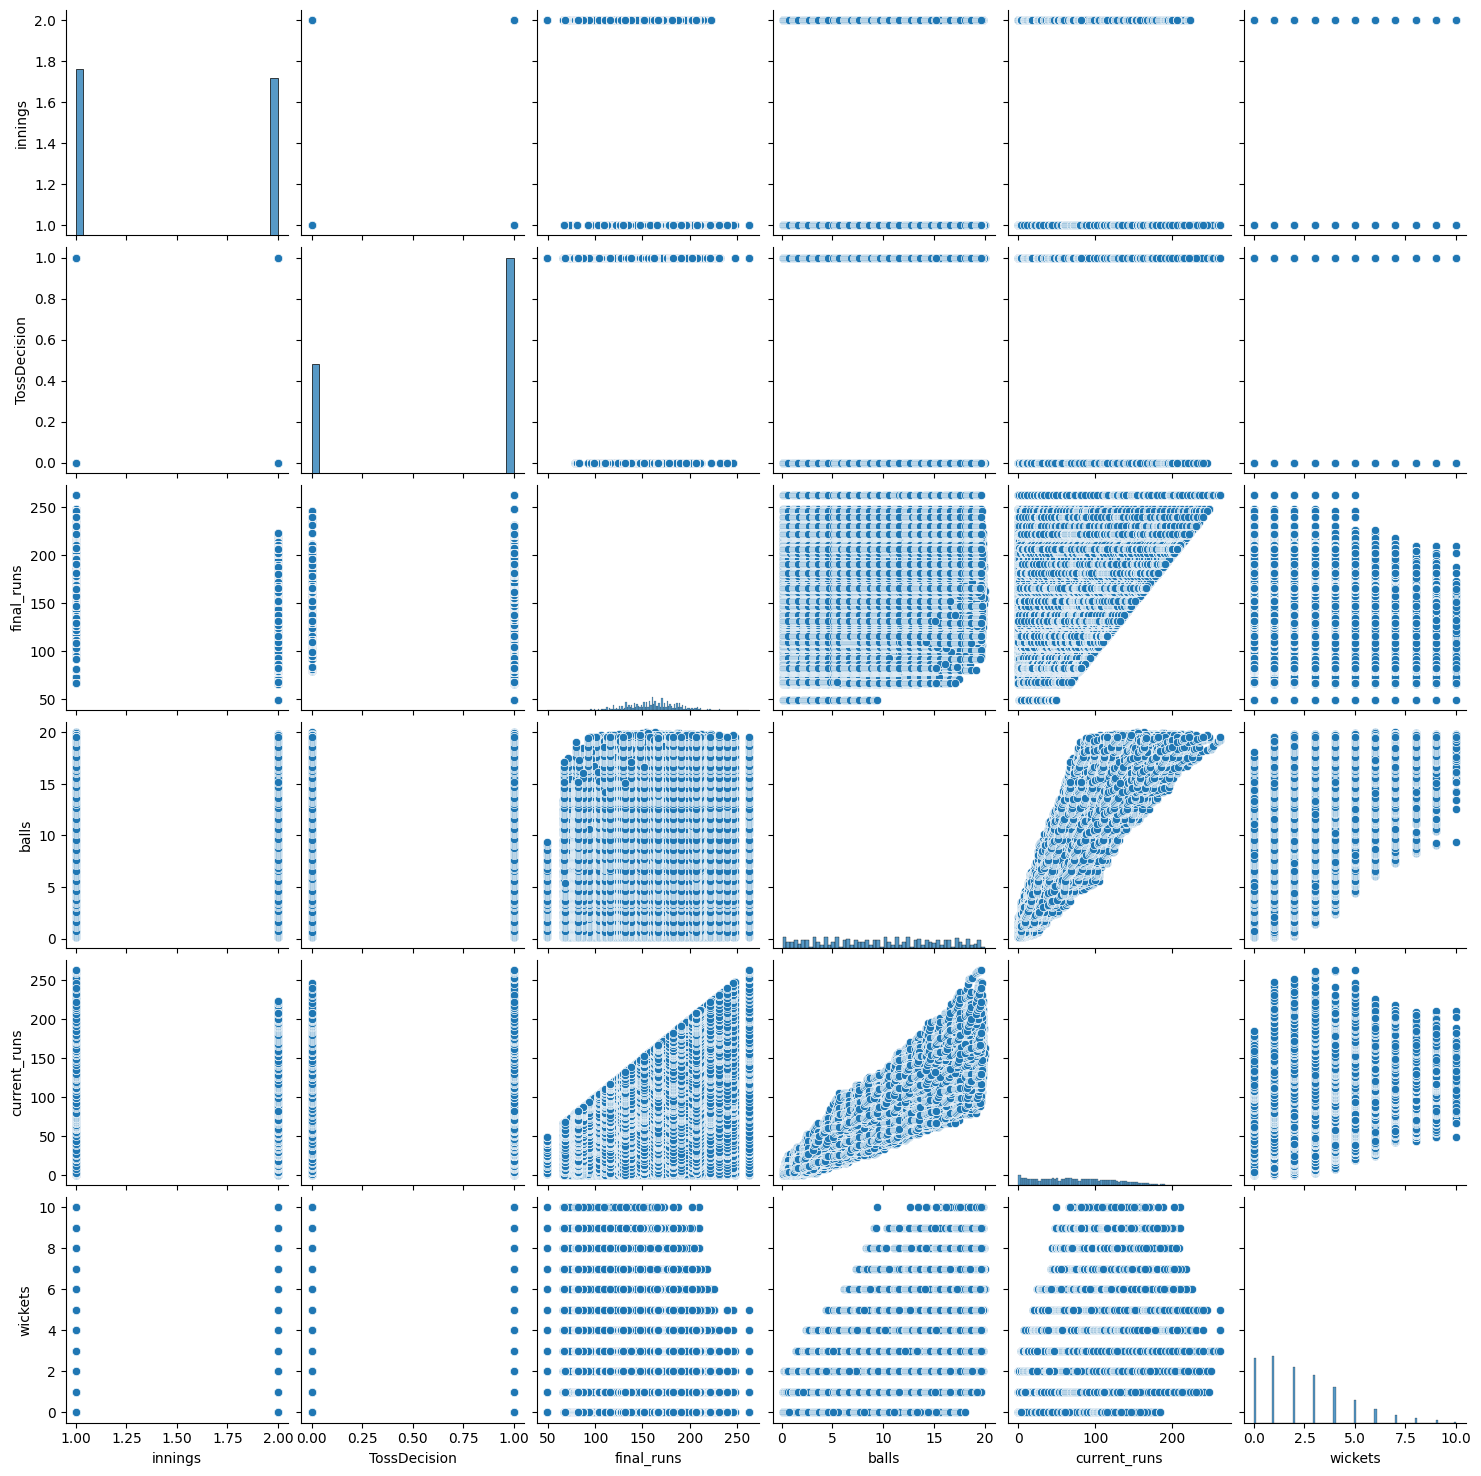

In [ ]:
sns.pairplot(df)

In [46]:
deliveries.filter(pl.col("balls")>5)

innings,batter,bowler,player_out,BattingTeam,City,Team1,Team2,TossWinner,TossDecision,Team1Players,Team2Players,final_runs,balls,current_runs,wickets,current_run_rate,expected_runs
i64,str,str,str,str,str,str,str,str,i64,list[str],str,i64,f64,i64,i64,f64,f64
1,"""SV Samson""","""Rashid Khan""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,5.1,41,1,6.833333,136.666667
1,"""SV Samson""","""Rashid Khan""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,5.2,42,1,7.0,140.0
1,"""JC Buttler""","""Rashid Khan""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,5.3,43,1,7.166667,143.333333
1,"""SV Samson""","""Rashid Khan""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,5.4,43,1,7.166667,143.333333
1,"""SV Samson""","""Rashid Khan""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,5.5,44,1,7.333333,146.666667
1,"""JC Buttler""","""Rashid Khan""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,5.6,44,1,7.333333,146.666667
1,"""SV Samson""","""LH Ferguson""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,6.1,44,1,6.285714,125.714286
1,"""SV Samson""","""LH Ferguson""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,6.2,45,1,6.428571,128.571429
1,"""JC Buttler""","""LH Ferguson""","""NA""","""Rajasthan Roya…","""Ahmedabad""","""Rajasthan Roya…","""Gujarat Titans…","""Rajasthan Roya…",0,"[""YBK Jaiswal"", ""JC Buttler"", … ""YS Chahal""]","""['WP Saha', 'S…",130,6.3,45,1,6.428571,128.571429


In [49]:
deliveries=deliveries.with_columns((deliveries['Team1Players'].drop(deliveries["player_out"])).alias("expected_runs"))
deliveries

AttributeError: 'Series' object has no attribute 'drop'

In [52]:
deliveries["Team1Players"].d

AttributeError: 'Series' object has no attribute 'drop'